In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os
import urllib.request
import random
from selenium.webdriver.chrome.options import Options

In [2]:
def GetImage(a, driver, SAVE_PATH, cnt, img_title, img_url, CLASS):
        # We want to keep our data organized in files based on class
        filepath = os.path.join(SAVE_PATH, f"fig_{cnt}.jpg")

        # Create a data row to put into a Pandas DataFrame
        d = {
            'filepath' : filepath,
            'title'    : img_title,
            'url'      : img_url,
            'class'    : CLASS
        }

        # Get the image from the url
        urllib.request.urlretrieve(img_url, filepath)
        cnt += 1

        # Wait so we don't get banned
        driver.implicitly_wait(random.randrange(0,3))
        
        return d

def GetImages(url, CLASS, ROOT_PATH, df):
    SAVE_PATH = os.path.join(ROOT_PATH, CLASS)

    if not os.path.isdir(SAVE_PATH):
        os.makedirs(SAVE_PATH)

    # Create a new Chrome session with Selenium so we can navigate Google's dynamic page and get URLs
    chrome_options = webdriver.ChromeOptions(); 
    chrome_options.add_experimental_option("excludeSwitches" , ["enable-automation","load-extension"])    
    chrome_options.add_argument("--headless")
    driver = webdriver.Chrome(options=chrome_options);  
#     driver.implicitly_wait(1)
    driver.set_page_load_timeout(10)
    driver.get(url)
    
    # Start the count after all the other files in same dir
    files_in_dir = os.listdir(SAVE_PATH)

    cnt = len(files_in_dir)

    l = []

    i = 0
    while i < 300:
        # First get all image elements from google images
        for a in driver.find_elements_by_xpath("//a[@class='wXeWr islib nfEiy mM5pbd']")[i:]:
            i += 1
            try:

                # We need to click on the image before the image url appears in the html
                a.click()

                # Now we can get the html with the updated image urls
                soup = BeautifulSoup(driver.page_source, 'lxml')

                # Get url and title
                img_title = soup.find('a', {'class' : 'Beeb4e'})['title']

                s_imgs = driver.find_elements_by_xpath("//img[@class='n3VNCb']")
                img_url = 'None'
                for img in s_imgs:
                    curr_url = img.get_attribute('src')
                    if 'http' in curr_url and 'https://encrypted-tbn0' not in curr_url:
                        img_url = curr_url
                if(img_url == 'None'):
                    continue
                print(img_url)

                if not df['url'].str.contains(img_url).any():
                    l.append(GetImage(a, driver, SAVE_PATH, cnt, img_title, img_url, CLASS))
                    cnt += 1
                    
            except Exception as e:
                print(e)
            except KeyboardInterrupted:
                raise
        
    driver.close()
    return l
        

https://i.pinimg.com/originals/24/16/77/241677e0e764a526ba265d883f75689f.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Hagia_Sophia_%2815468276434%29.jpg/170px-Hagia_Sophia_%2815468276434%29.jpg
https://architectureofcities.com/wp-content/uploads/2020/07/20131203_Istanbul_050.jpg
HTTP Error 403: Forbidden
https://www.pallasweb.com/p/1-averde-column-2.jpg
https://www.pallasweb.com/p/1-atwoprocols.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Hagia_Sophia_%2815468276434%29.jpg/340px-Hagia_Sophia_%2815468276434%29.jpg
https://i.pinimg.com/originals/3a/ec/c8/3aecc8e54ace7344b53602c5047f2901.jpg
https://www.pallasweb.com/p/1-aporo-column.jpg
https://i.pinimg.com/236x/0a/2f/c5/0a2fc5e5ed80808f9d66229fd728d74c--hagia-sophia-istanbul-byzantine-architecture.jpg
https://image.slidesharecdn.com/byzantinepowerpoint-131121072912-phpapp01/95/byzantine-art-powerpoint-38-638.jpg?cb=1385019022
https://i.pinimg.com/originals/32/64/31/326431e970b29301df86962bc16a0078.jpg
h

https://en.wikipedia-on-ipfs.org/I/m/SantApollininner.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/2017_0423_Ravenna_%28132%29.jpg/440px-2017_0423_Ravenna_%28132%29.jpg
https://i.pinimg.com/originals/fb/3e/50/fb3e50ca49642535210cf0db1a836282.jpg
https://i.pinimg.com/originals/41/08/85/4108853cfd07767fc7192f6d23f5397a.jpg
https://i.pinimg.com/236x/d7/ff/dc/d7ffdcedbd9ec784a13f253bf23e3099--old-church-slavonic-republic-of-macedonia.jpg
https://i.pinimg.com/236x/51/a0/fe/51a0fea765435a34384b31cc7a1cc77b--hagia-sophia-istanbul-byzantine-architecture.jpg
https://i.pinimg.com/236x/b8/03/58/b80358502d16d1fc1f9e3f2b96211702--byzantine-art-byzantine-mosaics.jpg
https://media.buzzle.com/media/images-en/gallery/architecture/1200-610940-byzantine-architecture.jpg
https://i.pinimg.com/originals/15/3b/02/153b0205b8bc1c258e5e767068032b06.jpg
https://en.wikipedia-on-ipfs.org/I/m/Hagia_Sophia_Interior_Dome.jpg
https://i.pinimg.com/564x/79/bf/2a/79bf2a02e0b26e0319d186682d0a560a.jpg
http

C:\Users\vel\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/2017_0423_Ravenna_%28132%29.jpg/220px-2017_0423_Ravenna_%28132%29.jpg
https://i.pinimg.com/originals/65/0f/7f/650f7f9af1c8bbe7362161275117e23c.jpg
https://i.pinimg.com/474x/15/3b/02/153b0205b8bc1c258e5e767068032b06--greek-orthodox-hagia-sophia.jpg
https://i.pinimg.com/236x/13/41/68/1341684f701785da25aff40872f53ecc--byzantine-mosaics-byzantine-icons.jpg
https://st4.depositphotos.com/4651905/22654/i/1600/depositphotos_226545806-stock-photo-istanbul-turkey-hagia-sophia-interior.jpg
https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/1104/2015/10/02024223/Compare.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Basilica_of_San_Vitale_-_Lamb_of_God_mosaic.jpg/298px-Basilica_of_San_Vitale_-_Lamb_of_God_mosaic.jpg
https://qph.fs.quoracdn.net/main-qimg-102d1dca29f7804de6b3eec2112926ac.webp
https://www.thoughtco.com/thmb/Om_OUtnGYvM6ZkwX6VwY0THp_E0=/2289x1525/filters:fill(auto,1)/Byza

https://i.pinimg.com/474x/b2/4b/10/b24b1042b02372f201ea75fb49458704--byzantine-mosaics-byzantine-art.jpg
https://images-na.ssl-images-amazon.com/images/I/518FP772DRL.jpg
https://i.pinimg.com/originals/97/ef/d0/97efd071fd1562dad94a2cd4c5b04044.jpg
https://i.pinimg.com/236x/05/04/70/0504704622f39ad0d32031ce7738560b--byzantine-architecture-hagia-sophia.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/20131203_Istanbul_048.jpg/500px-20131203_Istanbul_048.jpg
https://art.scholastic.com/content/dam/classroom-magazines/art/pages/art-on-demand/periods-and-styles/ART_AHOD_39_Byzantine_tn.jpg
https://previews.123rf.com/images/fotoall/fotoall1903/fotoall190300465/129534351-istanbul-turkey-1-may-2014-decorative-interior-of-hagia-sophia-museum-the-columns-carving-an-ornamen.jpg
https://i.pinimg.com/236x/04/20/da/0420dad8edbf330702bee23cf65ddd66.jpg
https://smarthistory.org/wp-content/uploads/2020/06/Hagia-Sophia-grid-2-570x350.jpg
HTTP Error 403: Forbidden
https://i.pinimg.com/original

https://i.pinimg.com/originals/b8/7d/8c/b87d8cd0573e70aaf0901e09617030d1.jpg
https://upload.wikimedia.org/wikipedia/commons/0/07/Gurlitt_Justinian_column.jpg
https://images.fineartamerica.com/images/artworkimages/mediumlarge/3/byzantine-column-capitals-of-the-hagia-sophia-ted-distel.jpg
https://3dwarehouse.sketchup.com/warehouse/v1.0/publiccontent/b539cdfc-2e69-453a-8817-608bdf4afae6
https://www.historyofpainters.com/byzantine_architecture%20.JPG
https://i.pinimg.com/originals/e1/79/f5/e179f5b7866ac5c0583f9ed5cd80bbe4.jpg
https://3.bp.blogspot.com/-lYpvDENwfq0/U3uAD4qWkCI/AAAAAAABGUA/WB6Qpx88KGY/s1600/11Justinian_column.jpg
https://rlv.zcache.com/ancient_byzantine_architecture_columns_poster-r8a23886431544511bb597c3eca760a89_wv8_8byvr_704.jpg
https://www.christies.com/img/LotImages/2010/CSK/2010_CSK_05488_0175_000(a_pair_of_byzantine_marble_columns_circa_5th_century_ad024129).jpg?mode=max
https://images.fineartamerica.com/images-medium-large/byzantine-ornament-granger.jpg
https://www.p

https://render.fineartamerica.com/images/rendered/small/canvas-print/mirror/break/images/artworkimages/square/3/byzantine-column-capitals-of-the-hagia-sophia-ted-distel-canvas-print.jpg
https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1849/2017/05/31163829/ders-from-the-encyclopedie.png
https://img1.cgtrader.com/items/1908852/36bd543d5a/carved-architectural-elements-in-byzantine-style-3d-model-max-obj-mtl-fbx-stl.jpg
https://cdn.ancientsculpturegallery.com/pub/media/catalog/product/cache/bc6accaccdfefd23b3b058f7e87d7447/f/3/f340_1.jpg
HTTP Error 403: Forbidden
https://previews.123rf.com/images/aenseidhe/aenseidhe2003/aenseidhe200300031/143068130-madiza-gorgon-column-base-in-a-byzantine-underground-water-reservoir-in-istanbul-popular-tourist-att.jpg
https://www.gpsmycity.com/img/gd_sight/23901.jpg
https://2.bp.blogspot.com/-P-n3VJrpRDQ/VkpKuSqCQeI/AAAAAAABmos/ZU3JfysMWDY/s1600/11istanbul_column_goth_3.JPG
https://www.ancient.eu/img/r/p/500x600/8710.jpg?v=160014

https://byzantinetrail.files.wordpress.com/2017/11/cropped-img_6151.jpg
https://ermakvagus.com/Asia/Jordan/Amman/New%20folder/Amman13.jpg
https://previews.agefotostock.com/previewimage/medibigoff/19cabc2be4873abb327b59c21ec2a3ea/ssb-1771-140.jpg
https://cdn.myminifactory.com/assets/object-assets/5991cb600cf0b/images/thumbnail-4474-museum-of-byzantine-culture-fragment-5.png
HTTP Error 403: Forbidden
https://slideplayer.com/slide/16509834/96/images/3/Create+a+KWL+Chart+Put+these+questions+in+the+W+column.jpg
https://www.researchgate.net/profile/Andrea_Paribeni/publication/284409296/figure/fig1/AS:669525498413056@1536638726007/Ravenna-Piazza-del-Popolo-palazzetto-Veneziano-Column-capital-of-the-porch_Q320.jpg
HTTP Error 403: Forbidden
https://www.realmofhistory.com/wp-content/uploads/2017/05/constantinople-reconstructed-4th-13th-century_26.jpg?ezimgfmt=rs:350x222/rscb18/ng:webp/ngcb18
HTTP Error 403: Forbidden
https://c8.alamy.com/comp/RTKG1T/byzantine-column-with-elaborately-carved-capit

https://c8.alamy.com/comp/MN9CW9/capitals-byzantine-st-marks-acanthus-leaf-torcello-1880-old-antique-print-MN9CW9.jpg
https://etc.usf.edu/clipart/60800/60857/60857_byzanti-cap_md.gif
https://i.pinimg.com/originals/5c/2b/a7/5c2ba7704d6ea6fe8fcc5f2c509ad347.gif
https://www.netclipart.com/pp/m/389-3896083_greek-clipart-corinthian-column-column-in-byzantine-architecture.png
https://3.bp.blogspot.com/-GY6ZIrfqpeI/UhC1O-QiCpI/AAAAAAAAATs/FlgfI6Ra-QM/s1600/48.jpg
https://3.bp.blogspot.com/-lYpvDENwfq0/U3uAD4qWkCI/AAAAAAABGUA/WB6Qpx88KGY/s1600/11Justinian_column.jpg
https://i.pinimg.com/236x/81/ac/86/81ac8618a918d7b5b235a6df731f55ad--byzantine-architecture-early-christian.jpg
https://image.slidesharecdn.com/vietcomparisonbetweenearlychristianandbyzantinearchitecture-160101032146/95/comparison-between-early-christian-and-byzantine-architecture-9-638.jpg?cb=1451618553
https://i.pinimg.com/236x/88/a4/e5/88a4e571793691ba69c73e84a0662ae6--archive-org-architectural-drawings.jpg
https://i.pinimg.com/

https://pceldran.files.wordpress.com/2014/12/il_570xn-80234197.jpg?w=491&h=383
https://pceldran.files.wordpress.com/2015/01/scan0218.jpg?w=1200
https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1849/2017/05/31163829/ders-from-the-encyclopedie.png
https://upload.wikimedia.org/wikipedia/commons/1/1d/EB1911_Capital_Fig._8.%E2%80%94Byzantine_Capitals_from_the_central_portal_of_St_Mark%E2%80%99s%2C_Venice.jpg
https://callawayinteriordesign.files.wordpress.com/2012/05/picture-41.png
https://i.pinimg.com/474x/fc/60/15/fc601573fb1a30a86b7ad427b3fcf36b.jpg
https://i.pinimg.com/236x/f7/fd/d5/f7fdd5c41f628e34f0d27364205bbb21--santa-sof%C3%ADa-byzantine-architecture.jpg
https://i.pinimg.com/236x/5c/2b/a7/5c2ba7704d6ea6fe8fcc5f2c509ad347--kanon-byzantine-art.jpg
https://lh3.googleusercontent.com/proxy/DCV4x0IL4jH-D1KNpTEdxOYhff3JfERZsS_6c-1RfCpb0W5ZkpqMu_L7AKNUEkXG8UDmKTwDIJdYyaJorkOwZtxQAsG2Xd6xHcuVYFUyEAc3ZxI
https://architecturaltravels.files.wordpress.com/2012/01/column

https://c8.alamy.com/comp/M673AE/byzantine-capital-ravenna-italy-M673AE.jpg
https://i.pinimg.com/236x/d4/e0/b8/d4e0b8db4bae59aff808324f4b691974--sketch-drawing-drawing-board.jpg
https://image.slidesharecdn.com/byzantimearchitecture-170515172755/95/byzantime-architecture-11-638.jpg?cb=1494869334
https://filsonarthistory.files.wordpress.com/2018/03/slide65.jpg?w=660
https://o.quizlet.com/i/F3WYtRsQrR1LYOSjxpLbUg.jpg
HTTP Error 403: Forbidden
https://i.pinimg.com/originals/d0/15/9d/d0159df2c16d27ed37718e929f4048fa.jpg
https://i.pinimg.com/originals/1d/59/b6/1d59b6907ade351b2918c611e984f191.jpg
https://www.gutenberg.org/files/29077/29077-h/images/fig_19.png
https://c8.alamy.com/comp/E8EGJW/sicily-or-siciliais-the-largest-island-in-the-mediterranean-and-has-E8EGJW.jpg
https://image.slidesharecdn.com/vietcomparisonbetweenearlychristianandbyzantinearchitecture-160101032146/95/comparison-between-early-christian-and-byzantine-architecture-17-638.jpg?cb=1451618553
https://i.pinimg.com/236x/4b/0d

https://slideplayer.com/slide/17008173/98/images/49/History+of+Architecture+-+III+09.+Byzantine+Architecture%3A.jpg
https://image.slidesharecdn.com/byzantineempire-170603130617/95/byzantine-empire-14-638.jpg?cb=1496495344
https://image.slidesharecdn.com/byzantinearchitecturefinal-160703064702/95/byzantine-architecture-20-638.jpg?cb=1467528433
https://i.pinimg.com/236x/93/65/a5/9365a50a6fec92121f93166c0b77f272--early-christian-church.jpg
https://image.slidesharecdn.com/byzantinearchitectureby-hardikprajapatiniravpatelmaitripatel-170523115047/95/byzantine-architecture-4-638.jpg?cb=1545540436
https://i.pinimg.com/200x150/5d/dd/e2/5ddde2be598622825d405b590f282f71.jpg
https://slideplayer.com/slide/14554898/90/images/24/Hagia+Sophia+This+1852+lithography+clearly+shows+two+of+the+great+pendentives..jpg
https://image.slidesharecdn.com/earlybyzantinearchitecture-141104103926-conversion-gate02/95/early-byzantine-architecture-13-638.jpg?cb=1415097678
https://image.slidesharecdn.com/arc047l17l-18l

https://i.pinimg.com/236x/89/67/00/896700019dc103e26dd92b948a4c263a--desain-interior-early-christian.jpg
https://p0.pikist.com/photos/467/419/basilica-st-sernin-toulouse-france-architectural-detail-artwork-historic-historical.jpg
HTTP Error 403: Forbidden
https://i.pinimg.com/236x/41/c3/01/41c30194a04ed1a388252369f10e820b--early-christian-ravenna.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Grossmunster_Portal_Medieval_Column_Grotesque_Capital.jpg/1024px-Grossmunster_Portal_Medieval_Column_Grotesque_Capital.jpg
https://upload.wikimedia.org/wikipedia/commons/a/aa/Capital_of_the_lions_-_Porte_Mi%C3%A8geville_-_Basilique_Saint-Sernin.jpg
https://images.fineartamerica.com/images/artworkimages/mediumlarge/3/byzantine-column-capitals-of-the-hagia-sophia-ted-distel.jpg
https://i.pinimg.com/originals/43/3c/20/433c20fc8e80545c8cbe89b35282064e.jpg
https://i.pinimg.com/474x/1d/b8/3a/1db83abe4c9e857d03cfc08b3b2ecbc3--ancient-architecture-building-architecture.jpg
https://i.pinimg.

https://i.pinimg.com/236x/15/3b/02/153b0205b8bc1c258e5e767068032b06--greek-orthodox-hagia-sophia.jpg
https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/1104/2015/10/02024218/BasketCaptial-1024x768.jpg
https://en.wikipedia-on-ipfs.org/I/m/SantApollininner.jpg
https://greekamericanexperience.files.wordpress.com/2018/04/photo6.jpg?w=700
https://www.historyofpainters.com/byzantine_architecture%20.JPG
https://lh3.googleusercontent.com/proxy/ZTq8v9I09OtyAtkK8Gmc6ivdSXqq7ONrf2xAzP0Afgvm1G1HlSWEXEQ0a013FJxPPdpkdMibYwXxSS1CIXoOlLwiZ2wXFFwdB3bHVsbGdyv6ABzKHdGdCg
Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=87.0.4280.88)

Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=87.0.4280.88)

Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=87.0.4280.88)

Message: stale ele

https://www.romeartlover.it/Efeso16.jpg
https://cdn.kastatic.org/googleusercontent/6iM7S3coeo6QgJBLBMfIkl5K1k_YRzt5_Bl1vmtsRJpN79-4oHew7fOlJ-DDY3KrUQ_PHbpuANfoWLNMFALQSHML
https://i.pinimg.com/236x/2e/7b/e8/2e7be831cfc7da3cd066d8a7da3db0d7--spiritual-symbols-religious-symbols.jpg
https://i.pinimg.com/originals/0a/bf/e7/0abfe7aa6d67d782f7ace4a851346e0b.jpg
https://c8.alamy.com/comp/EYG5F1/remains-of-the-byzantine-cardo-built-by-emperor-justinian-in-the-6th-EYG5F1.jpg
https://lh3.googleusercontent.com/proxy/WoxfvsSZHbPs9dGIH7hOeefUYBWB7Ali3bw0v1P8VfOT7GC-dBPGR0io6coJJe-UKtqOckeGaT6gZCCMEVu3FAlc5VKXt4NsW-o7-w5oOrAnAmc_t5l1N9mYf4fUVLQ7FtXbLVGxGZJd4NvCB2NSxl-6Peosd895lBltHg
https://i.pinimg.com/originals/80/c4/fa/80c4fa8b0fe918fcf003b224f0bd5741.jpg
https://i.pinimg.com/236x/29/d2/ea/29d2ea100857265d74807be1efd26bfb--ionic-order-arches.jpg
https://www.ancient.eu/img/c/p/360x202/7971.jpg?v=1569518595
HTTP Error 403: Forbidden
https://i.pinimg.com/236x/97/21/c1/9721c1545aa521825a0071e63d13d91

https://i.pinimg.com/originals/f0/39/c6/f039c60ff3f232c0c92869a05862d38f.jpg
https://images-na.ssl-images-amazon.com/images/I/518FP772DRL._AC_UL600_SR543,600_.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Hagia_Sophia_%2815468276434%29.jpg/220px-Hagia_Sophia_%2815468276434%29.jpg
https://c8.alamy.com/comp/M09WDC/byzantine-capital-detail-and-column-in-the-north-west-gallery-of-the-M09WDC.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Diptych_Barberini_Louvre_OA9063_whole.jpg/256px-Diptych_Barberini_Louvre_OA9063_whole.jpg
https://www.pallasweb.com/p/holy-well-16a.jpg
https://lh3.googleusercontent.com/proxy/VozIsnLTwsrnSTgygA36WVENBJvl_p5G1G3yC8W4DgdbkKbTYrSC29Q8EHE6KvfSO4XVIaNkNKhQo2gcz_pF38mAfs_cdlBbcoT-Vw
https://image.slidesharecdn.com/byzantinearchitecture-140506061240-phpapp01/95/byzantine-architecture-6-638.jpg?cb=1399356868
https://images-na.ssl-images-amazon.com/images/I/518FP772DRL._SX258_BO1,204,203,200_.jpg
https://i.pinimg.com/236x/05/12/30/051
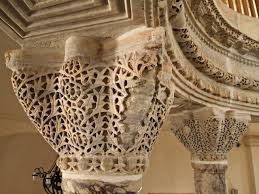

https://i.pinimg.com/originals/85/8d/ab/858dabb7bcc2ef7ebc4b958d96c78947.jpg
https://i.pinimg.com/originals/9e/42/c6/9e42c620dfa0ce2fc831ca8a6167e3ed.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Byzantine_column_Hagia_Sophia_March_2008.JPG/310px-Byzantine_column_Hagia_Sophia_March_2008.JPG
https://c8.alamy.com/comp/CE5PT5/the-dome-and-turrets-of-st-marks-basilica-cattedrale-patriarcale-di-CE5PT5.jpg
https://static2.bigstockphoto.com/3/2/1/large1500/123185597.jpg
https://l450v.alamy.com/450ves/ed5hfc/detalle-de-columnas-y-capiteles-byzantiene-en-la-entrada-la-basilica-de-san-marcos-en-venecia-italia-ed5hfc.jpg
https://media.istockphoto.com/illustrations/early-christian-and-byzantine-architecture-wood-engravings-published-illustration-id927871272
https://calisphere.org/clip/500x500/b50e0588d18554710eb5828cfe9ceb65
https://media.archinform.net/m/00013511.jpg
https://previews.123rf.com/images/celli07/celli071708/celli07170800220/83773755-close-up-of-columns-and-capitals-ma


Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=87.0.4280.88)

Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=87.0.4280.88)

Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=87.0.4280.88)

Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=87.0.4280.88)

https://www.doaks.org/resources/online-exhibits/holy-apostles/the-holy-apostles/dome-of-the-pentecost-basilica-of-san-marco-venice/@@images/image/thumb
https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Kompositt.kapitel.jpg/300px-Kompositt.kapitel.jpg
https://crashmacduff.files.wordpress.com/2014/02/1rome1.jpg?w=350&h=200&crop=1
https://www.thevintagenews.com/wp-content/uploads/2017/07/the-interior-of-the-basilica-is-based-on-a-greek-cross-640x479.jpg
https://upload.wikimedia.or

KeyboardInterrupt: 

In [4]:
csv = r'E:\Projects\Columns\Notebooks\Input.csv'
csv_df = pd.read_csv(csv)
ROOT_PATH = r'E:\Projects\Columns\Data'

df = pd.DataFrame(columns=['filepath', 'title', 'url', 'class'])
for index, row in csv_df.iterrows():
    df = pd.concat([df, pd.DataFrame(GetImages(row['url'], row['class'], ROOT_PATH, df))])

In [ ]:
df

In [ ]:
df.to_csv(os.path.join(ROOT_PATH, 'Catalogue.csv'), mode='a', header=False)